<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/Calibration_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calibrated Prediction Probabilities

In [ ]:
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

def calibration_plot(preds=[], actuals=[], bins=10, model_name="NFL Win Model"):
    """
    Calibration Plot for predicted probabilities

    Args:
        preds:   Predicted probabilities
        actuals: Actual result

    Returns:
        Calibration Plot
    """

    predmeans, predbins, predindexes = stats.binned_statistic(
        preds, preds, bins=bins, statistic="mean"
    )
    predmeans = predmeans[~np.isnan(predmeans)]
    predbins = predbins[~np.isnan(predbins)]
    predcounts, predbincounts, predcountindexes = stats.binned_statistic(
        preds, preds, bins=bins, statistic="count"
    )
    predcounts = predcounts[~np.isnan(predcounts)]
    actualmeans, actualbins, actindexes = stats.binned_statistic(
        preds, actuals, bins=bins, statistic="mean"
    )
    actualmeans = actualmeans[~np.isnan(actualmeans)]
    actualbins = actualbins[~np.isnan(actualbins)]
    actualcounts, actualbincounts, actualcountindexes = stats.binned_statistic(
        preds, actuals, bins=bins, statistic="count"
    )
    actualcounts = actualcounts[~np.isnan(actualcounts)]
    r2 = round(np.corrcoef(predmeans, actualmeans)[0][1], 3)
    print(r2)

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=actualmeans,
            y=predmeans,
            name="predicted",
            mode="lines+markers",
            hovertext=predcounts,
        )
    )
    fig.add_trace(
        go.Scatter(
            x=actualmeans,
            y=actualmeans,
            name="perfect calibration",
            mode="lines+markers",
            hovertext=actualcounts,
        )
    )
    fig.update_layout(
        title="Calibration plot for " + model_name,
        xaxis_title="True Mean in each bin",
        yaxis_title="Predicted Mean in each bin",
    )
    fig.show()


def decile_plot(preds=[], actuals=[], bins=10, model_name="NFL Win Model"):
    """
    Decile Plot for predicted probabilities

    Args:
        preds:   Predicted probabilities
        actuals: Actual result

    Returns:
        Decile Plot
    """

    df = pd.DataFrame({"preds": preds, "actuals": actuals})
    df["decile"] = pd.qcut(df["preds"], bins, labels=False)
    df = df.groupby("decile").agg({"preds": ["mean"], "actuals": ["mean"]})

    # Plot training & validation accuracy values
    plt.figure(figsize=(16, 8))
    plt.plot(df.preds["mean"])
    plt.plot(df.actuals["mean"])
    plt.title("Decile Plot")
    plt.ylabel("Probability")
    plt.xlabel("Decile")
    plt.legend(["Predicted Probability", "Actual Probability"], loc="upper left")
    plt.show()


## Fake Model

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)
# define the logistic regression model
model = LogisticRegression()
# fit the model on the whole dataset
model.fit(X, y)
# predict probability distribution
preds = model.predict_proba(X)


## Calibration Plot

This view looks at your model's predicted probabilities based on the bin of the actuals

In [ ]:
calibration_plot(preds=preds[:,1], actuals=y, bins=10)

0.973


## Decile Plot

This view looks at the actuals based on the bin of your model's predicted probabilities

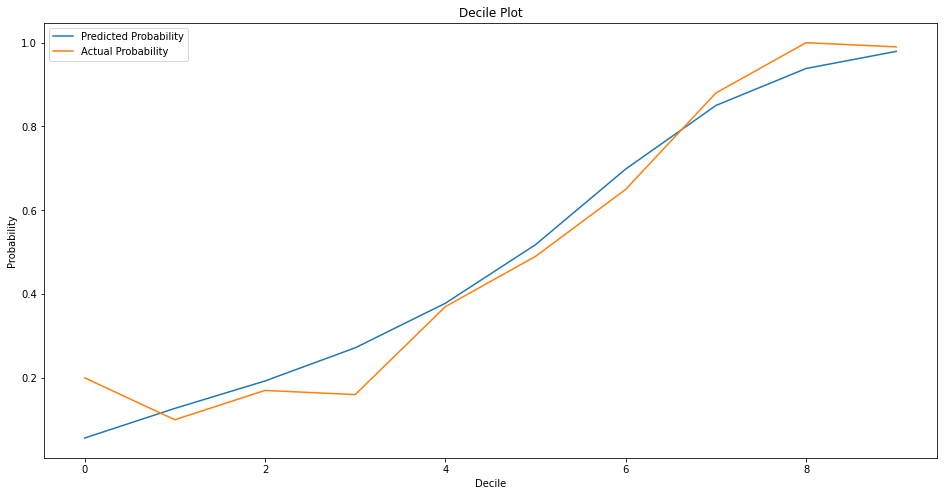

In [ ]:
decile_plot(preds=preds[:,1], actuals=y, bins=10)